## Importing the standard libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
data = pd.read_csv('Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Linear Relationship check

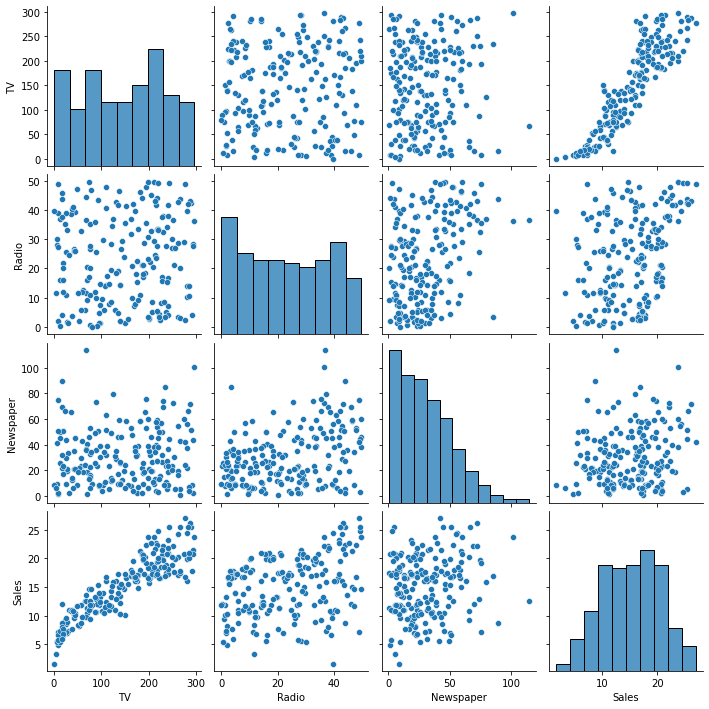

In [3]:
sns.pairplot(data)

## Corealation Check (Multicolinearity check)

<AxesSubplot:>

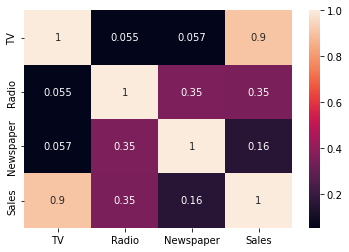

In [4]:
corr = data.corr()
sns.heatmap(corr, annot = True)

- Newspaper is having very less relation with Sales hence we don't consider Newspaper for model building. We drop Newspaper

In [5]:
data.drop('Newspaper', axis = 1, inplace  =True)
data

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,12.0
3,151.5,41.3,16.5
4,180.8,10.8,17.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,14.0
197,177.0,9.3,14.8
198,283.6,42.0,25.5


<AxesSubplot:>

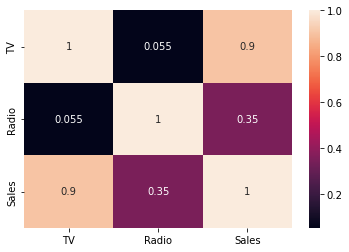

In [6]:
corr = data.corr()
sns.heatmap(corr, annot = True)

## Seperate X and y

In [7]:
X = data.drop('Sales', axis = 1)
y = data['Sales']

In [8]:
X

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [9]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

## Divide the data into train and test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
X_train

,TV,Radio
71,109.8,14.3
124,229.5,32.3
184,253.8,21.3
97,184.9,21.0
149,44.7,25.8
...,...,...
67,139.3,14.5
192,17.2,4.1
117,76.4,0.8
47,239.9,41.5


In [12]:
X_test

,TV,Radio
18,69.2,20.5
170,50.0,11.6
107,90.4,0.3
98,289.7,42.3
177,170.2,7.8
182,56.2,5.7
5,8.7,48.9
146,240.1,7.3
12,23.8,35.1
152,197.6,23.3


## Fit the model on train data

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

## Predict the model on X_test

In [16]:
y_pred = lr.predict(X_test)
y_pred

array([10.69000414,  8.68116978,  9.59310061, 24.88283981, 14.68655197,
        8.36121044, 10.59153363, 18.36763046,  9.87513463, 17.86233115,
       23.40896965, 10.69165552, 13.38552769, 17.09562372, 11.75933716,
       13.31668421, 21.13273114,  9.13719904, 14.17455027, 18.85038913,
       24.84787114, 12.43698385, 16.57134635, 13.79889947,  7.80841049,
       15.12769507, 14.68355395, 20.66459529, 16.96609677,  8.90686147,
       12.39261245, 20.81325972, 21.26641252, 21.84243479,  7.18886496,
        7.0633295 ,  9.23846676, 15.58434085, 13.2968439 ,  7.27863557,
       10.96175295,  9.12751273, 15.60091979, 18.20567222, 18.84689261,
       13.48527878,  5.41946616, 10.45575786, 15.52058977, 10.94827596])

## Intercept and Slope Check

In [17]:
lr.intercept_ , lr.coef_

(4.727940861061221, array([0.05345177, 0.11040005]))

- Equation is 
Sales = b0 + b1 * TV + b2 * Radio

b0 = 4.72  
b1 = 0.05  
b2 = 0.11  

Sales = 4.72 + 0.05 * TV + 0.11 * Radio

#### Predict on some sample data

In [19]:
Sales = 4.72 + 0.05 * 230.1 + 0.11 * 37.8
Sales

20.383000000000003

## Performance of the model

In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(y_pred, y_test) * 100
r2

83.96498825389924

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test)

3.9583855738636102

In [23]:
mean_squared_error(y_pred, y_test, squared = False)

1.9895691930324038

- 1.98 is the average error between all the predicted values and the actual values

In [24]:
## Adjusted R squared or Adjusted r2_score

In [30]:
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)))
adj_r2

85.09376360429242